# Thresholding and Clustering.

In [1]:
import cv2 as cv
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Changing the Intensity Levels.

Shape of image: (1200, 2137, 3)


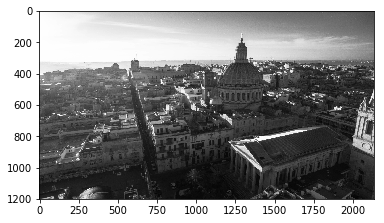

In [2]:
malta = cv.imread('data/malta.jpg')
print('Shape of image:', malta.shape)
plt.imshow(malta)

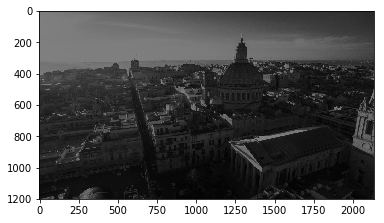

In [3]:
plt.imshow(np.round(np.divide(malta, 2)).reshape(malta.shape).astype(np.uint8))

## 2. Image Compression.

### 2a. Discrete Cosine Transform.

The discrete cosine transform (DCT) represents an image as a sum of sinusoids of varying magnitudes and frequencies. The dct2 function computes the two-dimensional discrete cosine transform (DCT) of an image. The DCT has the property that, for a typical image, most of the visually significant information about the image is concentrated in just a few coefficients of the DCT. For this reason, the DCT is often used in image compression applications. For example, the DCT is at the heart of the international standard lossy image compression algorithm known as JPEG.  

Note that this transformation is linear and invertible. It is computationally easier to implement, and more efficient, to regard the DCT as a set of basis functions which, given a known input array of size (8, 8), cn be used to store a convolution mask of size (8, 8). Subsequently, the mask is applied to all rows and columns of the image.

In [4]:
from scipy import fftpack

Size of color image: (1024, 1024)
Size of gray-scale image: (512, 512)


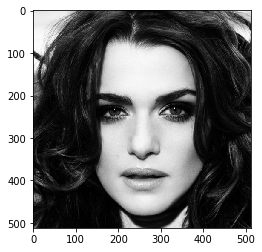

In [5]:
img = Image.open('data/face.jpg')
img_color = img.resize((512,512), 1)
img_grey = img_color.convert('L') # convert to grayscale
print('Size of color image:', img.size)
print('Size of gray-scale image:', img_grey.size)
plt.imshow(img_grey)

In [6]:
# Convert gray-scale imgage into a numpy array
img = np.array(img_grey, dtype=np.float)

Define some helper functions.  

Here we will use the DCT implementation provided by scipy (https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.fftpack.dct.html).

In [7]:
def get_2d_dct(img):
    img_copy = img.copy()
    """ Get 2D Cosine Transform of Image
    """
    return fftpack.dct(fftpack.dct(img_copy.T, norm='ortho').T, norm='ortho')

def get_2d_idct(coefficients):
    """ Get 2D Inverse Cosine Transform of Image
    """
    return fftpack.idct(fftpack.idct(coefficients.T, norm='ortho').T, norm='ortho')

def get_reconstructed_image(raw):
    img = raw.clip(0, 255) # limit values in the array
    img = img.astype('uint8')
    img = Image.fromarray(img)
    return img

The DCT transforms an 8×8 block of input values to a linear combination of the 64 patterns shown below. The patterns are referred to as the two-dimensional DCT basis functions, and the output values are referred to as transform coefficients. The horizontal index is `u` and the vertical index is `v`.

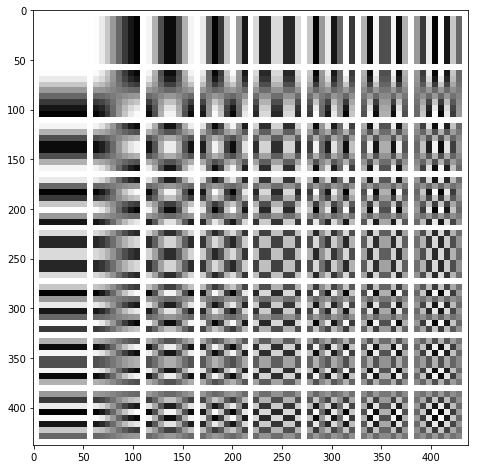

In [8]:
dct8x8 = Image.open('data/DCT-8x8.png')
plt.figure(figsize=(8,8))
plt.imshow(dct8x8)

**Example of a discrete cosine transform.** Note that the contributions of the high-frequency data (coefficients in lower right part of the matrix) are smaller than the contributions from the low-frequency data (coefficients in the upper left corner of the matrix.

In [9]:
small_image = np.array([[62,55,55,54,49,48,47,55],
                        [62,57,54,52,48,47,48,53],
                        [61,60,52,49,48,47,49,54],
                        [63,61,60,60,63,65,68,65],
                        [67,67,70,74,79,85,91,92],
                        [82,95,101,106,114,115,112,117],
                        [96,111,115,119,128,128,130,127],
                        [109,121,127,133,139,141,140,133]])

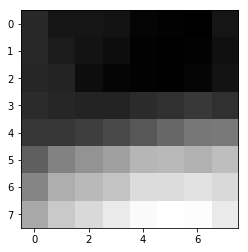

In [10]:
plt.imshow(small_image, 'gray')

In [11]:
small_img_centered = small_image - 128
dct_transformed = get_2d_dct(small_img_centered)
dct_original = get_2d_idct(dct_transformed)

print('Transformed mtrix')
print(dct_transformed)
print('\nInverse DCT of transformed matrix')
print(np.round(small_img_centered + 128))

Transformed mtrix
[[ -3.69625000e+02  -2.96719507e+01  -2.64114728e+00  -2.47185937e+00
   -1.12500000e+00  -3.71102208e+00  -1.47668245e+00  -7.78965770e-02]
 [ -2.31075440e+02   4.49222951e+01   2.44853848e+01  -2.73620842e-01
    9.29876189e+00   3.91298014e+00   4.29064335e+00  -1.35053332e+00]
 [  6.28466802e+01   8.53137755e+00  -7.58102903e+00  -2.65976870e+00
    3.15033920e-01  -4.08016623e-01   5.06281566e-01  -8.29373899e-01]
 [  1.24971821e+01  -1.46064521e+01  -3.48447983e+00  -3.44243764e+00
    2.42570669e+00  -1.32617523e+00   2.71637255e+00  -3.82986729e-01]
 [ -4.87500000e+00  -3.85639599e+00   8.72644544e-01   3.56450384e+00
    1.25000000e-01   5.12425500e+00   1.12682807e+00   4.76479804e-01]
 [ -4.75232134e-01   3.19364690e+00  -1.43327984e+00   2.04154859e-01
   -1.05945298e+00  -1.48307639e+00  -1.13133398e+00   9.03955517e-01]
 [  4.41033335e+00   2.28480622e+00  -1.74371843e+00  -1.56597265e+00
    1.08719990e+00  -2.74097898e+00   1.08102903e+00  -1.40581417e

In [12]:
dct_size = img.shape[0]
dct = get_2d_dct(img)
reconstructed_images = []

for i in range(dct_size):
    dct_copy = dct.copy()
    dct_copy[i:,:] = 0
    dct_copy[:,i:] = 0
    
    # Reconstructed images
    r_img = get_2d_idct(dct_copy)
    reconstructed_image = get_reconstructed_image(r_img)

    # Create a list of reconstructed images
    reconstructed_images.append(reconstructed_image)

The graph shown below indicates that the number of very large and very small coefficients is relatively low. Typically, the trade-off between compression and image quality depends on the coefficients with values in the middle.

Text(0.5,1,'Amplitude distribution of DCT Coefficients')

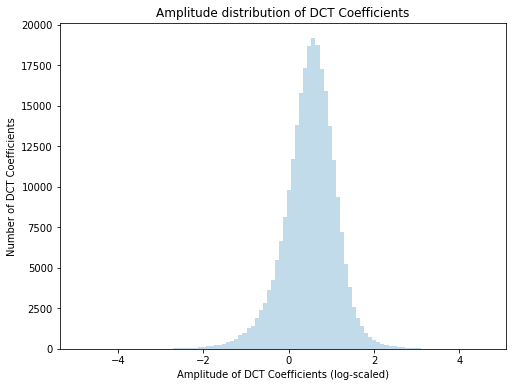

In [13]:
plt.figure(figsize=(8, 6))
plt.hist(np.log10(np.abs(dct.ravel())), bins=100, color='#348ABD', alpha=.3, histtype='stepfilled')
plt.xlabel('Amplitude of DCT Coefficients (log-scaled)')
plt.ylabel('Number of DCT Coefficients')
plt.title('Amplitude distribution of DCT Coefficients')

The graph below shows the reconstructed image using an increasing number of coefficients (64 out of 256) which capture most of the image chracteristics. Thus, we could get a very compression without too much loss of image quality if we discard some of the higher frequency coefficients. Since most of the signals are low frequency by nature, this approach works quite well in practice. We remove the high frequency coefficients and transmit the "important" coefficients (the coefficients that have most information about the signal).

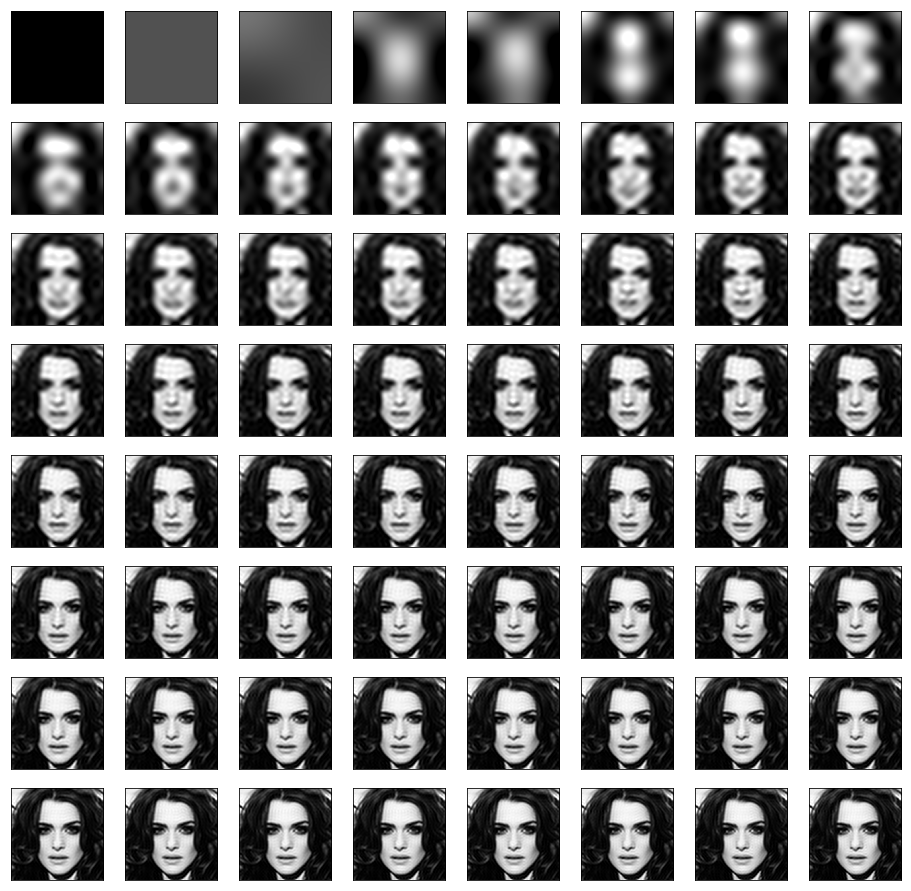

In [14]:
fig = plt.figure(figsize=(16, 16))
for i in range(64):
    plt.subplot(8, 8, i + 1)
    plt.imshow(reconstructed_images[i], cmap=plt.cm.gray)
    plt.grid(False);
    plt.xticks([]);
    plt.yticks([]);

At this point we have transformed each 8x8 block of our image into 8x8 blocks of coefficients that can be used by the inverse-DCT to reconstruct our original image but what we do want is to **decrease** the number of bits required to store our image in such a way that, after reversal, we recreate the original image as accurately as possible.  

This can be achieved by using quantization and Huffman encoding.

### 2b. Quantization.

Since we will be necoding a grayscale we only use the quantization table for the luminance channel. For more information see https://en.wikipedia.org/wiki/JPEG.

In [15]:
# Quantization table for the luminance channel
def quantize_QY(M):
    """
    Accepts a matrix, divides by the QY matrix and rounds.
    """
    M_copy = M.copy()
    QY = np.array([[16,11,10,16,24,40,51,61],
                 [12,12,14,19,26,48,60,55],
                 [14,13,16,24,40,57,69,56],
                 [14,17,22,29,51,87,80,62],
                 [18,22,37,56,68,109,103,77],
                 [24,35,55,64,81,104,113,92],
                 [49,64,78,87,103,121,120,101],
                 [72,92,95,98,112,100,103,99]]).T
    
    M_copy = np.round(M_copy  / QY)
    return M_copy

M_quantized = quantize_QY(dct_transformed)
print(M_quantized)

[[-23.  -2.  -0.  -0.  -0.  -0.  -0.  -0.]
 [-21.   4.   2.  -0.   0.   0.   0.  -0.]
 [  6.   1.  -0.  -0.   0.  -0.   0.  -0.]
 [  1.  -1.  -0.  -0.   0.  -0.   0.  -0.]
 [ -0.  -0.   0.   0.   0.   0.   0.   0.]
 [ -0.   0.  -0.   0.  -0.  -0.  -0.   0.]
 [  0.   0.  -0.  -0.   0.  -0.   0.  -0.]
 [ -0.  -0.   0.  -0.   0.   0.  -0.   0.]]


The function `process_image` below accepts an image matrix, centers the data, applies the discrete cosine transform, and quantizes the values. It then returns the quantized matrix for Huffman encoding.

In [16]:
def process_image(img_data, blocksize):
    end = img_data.shape[0]
    img_copy = img_data.copy()
    img_copy_centered = img_copy - 128
    
    for row in range(0, end, blocksize):
        for col in range(0, end, blocksize):
            img_copy[row:row+blocksize,col:col+blocksize] = \
                get_2d_dct(img_copy_centered[row:row+blocksize,col:col+blocksize])
                
    quantized_matrix = quantize_QY(img_copy)
                
    return quantized_matrix

quantized_matrix = process_image(small_image, 8)
print(quantized_matrix)

[[-23.  -2.  -0.  -0.  -0.  -0.  -0.   0.]
 [-21.   4.   2.   0.   0.   0.   0.  -0.]
 [  6.   1.  -0.  -0.   0.   0.   0.   0.]
 [  1.  -1.  -0.  -0.   0.  -0.   0.   0.]
 [ -0.  -0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.  -0.   0.  -0.  -0.  -0.   0.]
 [  0.   0.  -0.  -0.   0.  -0.   0.  -0.]
 [ -0.  -0.   0.   0.   0.   0.   0.   0.]]


### 2c. Huffman Coding.

In [17]:
from heapq import heappush, heappop, heapify
from collections import defaultdict

In [18]:
# generate dictionary of counts
def symb2freq(quantized_matrix):
    l = quantized_matrix.flatten()
    d = defaultdict(int)
    for elem in l:
        d[int(elem)] += 1
    return d

symbol_mapping = symb2freq(quantized_matrix)
print(symbol_mapping)

defaultdict(<class 'int'>, {-23: 1, -2: 1, 0: 55, -21: 1, 4: 1, 2: 1, 6: 1, 1: 2, -1: 1})


In [19]:
def encode(symb2freq):
    """Huffman encode the given dict mapping symbols to weights"""
    heap = [[wt, [sym, ""]] for sym, wt in symb2freq.items()]
    heapify(heap)
    while len(heap) > 1:
        lo = heappop(heap)
        hi = heappop(heap)
        for pair in lo[1:]:
            pair[1] = '0' + pair[1]
        for pair in hi[1:]:
            pair[1] = '1' + pair[1]
        heappush(heap, [lo[0] + hi[0]] + lo[1:] + hi[1:])
    return sorted(heappop(heap)[1:], key=lambda p: (len(p[-1]), p))

In [20]:
huff = encode(symbol_mapping)
print("Symbol\tWeight\tHuffman Code")
for p in huff:
    print("%s\t%s\t%s" % (p[0], symbol_mapping[p[0]], p[1]))

Symbol	Weight	Huffman Code
0	55	1
1	2	001
-2	1	0000
-1	1	0001
2	1	0100
4	1	0101
6	1	0110
-23	1	01110
-21	1	01111


The quantized matrix is traversed from right to left along the diagonal and each entry is compared to the Huffman encoding. In the case of our `small_image` we end up with the string '1 0000 01111 1 0101 0110 1 0100 001 001 1 1 1 0001 1' (spaces will not appear). The last entry in the Huffman string is the number at position (0, 4) in the quantized matrix. After this we could include and 'end-of-string' character since all other entries in the quantized matrix are zero. Note that this particular encoding will require tht the Huffman dictionary is stored as well because codes re not unambiguous.

## 3. Simple Thresholding.

Thresholding is the simplest method of image segmentation. From a grayscale image, thresholding can be used to create binary images.

All thresholding algorithms take a source image (`src`) and a threshold value (`thresh`) as input and produces an output image (`dst`) by comparing the pixel value at the source pixel (`x,y`) to the threshold. If `src(x,y)` is greater than `thresh`, then `dst(x,y)` is assigned some specified value. Otherwise, `dst(x,y)` is assigned some other value.

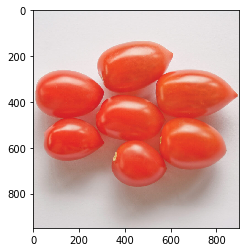

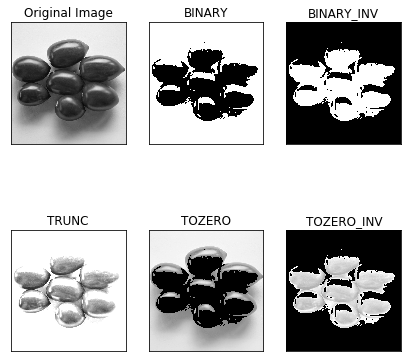

In [21]:
img = cv.imread('data/tomatoes.jpg')
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

ret,thresh1 = cv.threshold(img,127,255,cv.THRESH_BINARY) # white if thresh greater than 127
ret,thresh2 = cv.threshold(img,127,255,cv.THRESH_BINARY_INV) # inverse of THRESH_BINARY
ret,thresh3 = cv.threshold(img,127,255,cv.THRESH_TRUNC) # dst set to thresh if src greater than thresh
ret,thresh4 = cv.threshold(img,127,255,cv.THRESH_TOZERO) # dst set to corresponding pixel value if src greater than thresh
ret,thresh5 = cv.threshold(img,127,255,cv.THRESH_TOZERO_INV) # dst set to zero if src is greater thn thresh

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

plt.figure(figsize=(7,7))

for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

## 4. Adaptive Thresholding.

Like global (simple) thresholding, adaptive thresholding is used to separate desirable foreground image objects from the background based on the difference in pixel intensities of each region. Global thresholding uses a fixed threshold for all pixels in the image and therefore works only if the intensity histogram of the input image contains neatly separated peaks corresponding to the desired subject(s) and background(s). Hence, it cannot deal with images containing, for example, a strong illumination gradient.  

Local adaptive thresholding, on the other hand, selects an individual threshold for each pixel based on the range of intensity values in its local neighborhood. This allows for thresholding of an image whose global intensity histogram doesn't contain distinctive peaks (https://homepages.inf.ed.ac.uk/rbf/HIPR2/adpthrsh.htm). 

(1048, 1848)


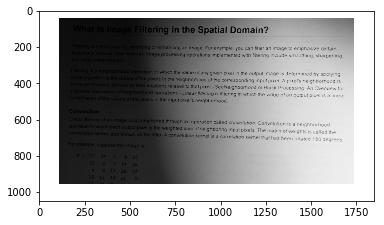

In [22]:
img = cv.imread('data/page.png')
img = cv.medianBlur(img,5)
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
print(img.shape)
plt.imshow(img, 'gray')

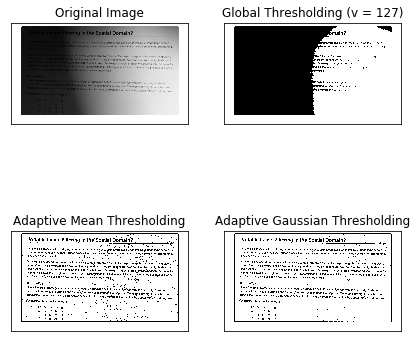

In [23]:
# In cv.ADAPTIVE_THRESH_MEAN_C and ADAPTIVE_THRESH_GAUSSIAN_C, the first number is the blocksize
# The last number is  constnt subtracted from the mean or weighted mean
ret,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
th2 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY,13,2)
th3 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY,13,2)

titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]

plt.figure(figsize=(7,7))

for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

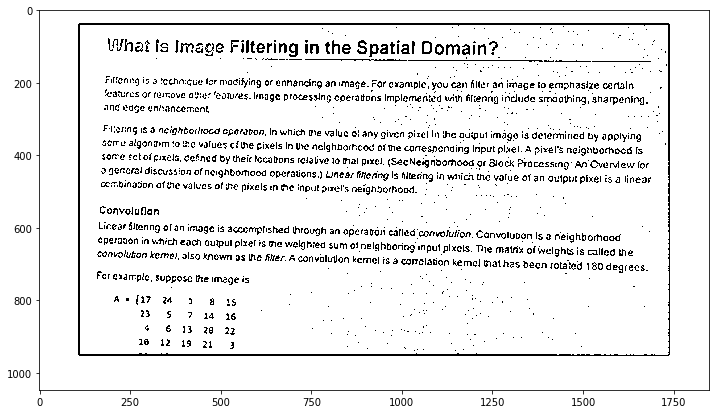

In [24]:
plt.figure(figsize=(12,17))
plt.imshow(images[3], 'gray')

In [25]:
img = cv.imread('data/traffic.jpg')
print('Shape of image:', img.shape)

Shape of image: (799, 1200, 3)


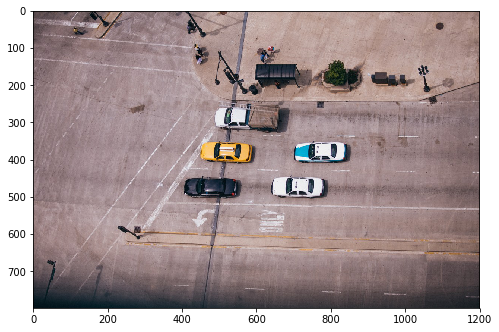

In [26]:
plt.figure(figsize=(8,12))
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))

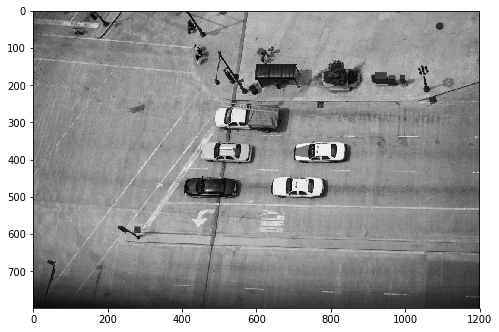

In [27]:
gray_img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
plt.figure(figsize=(8,12))
plt.imshow(gray_img, cmap = plt.get_cmap('gray'))

In [28]:
flat_img = gray_img.flatten()

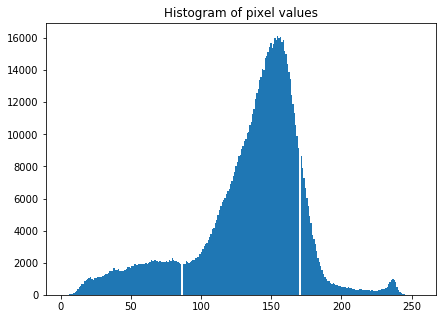

In [29]:
plt.figure(figsize=(7,5))
plt.hist(flat_img, bins=256)
plt.title('Histogram of pixel values')
plt.show()

Image blurring is achieved by convolving the image with a low-pass filter kernel. It is useful for removing noises. It actually removes high frequency content (eg: noise, edges) from the image. So edges are typically blurred a little bit in this operation. The bilateral filter is a technique to smooth images while preserving edges.

## Thresholding.

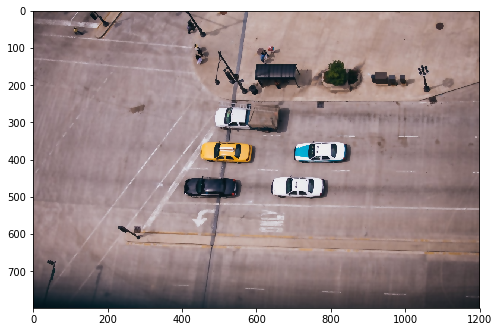

In [30]:
h = 7
hColor = 20
templateWindowSize = 7 # Size in pixels of the window that is used to compute weighted average for given pixel. Should be odd.
searchWindowSize = 21 # Size in pixels of the template patch that is used to compute weights. Should be odd

#blur = cv.fastNlMeansDenoisingColored(img, None,h,hColor,templateWindowSize,searchWindowSize)
blur = cv.bilateralFilter(img,9,75,75)
plt.figure(figsize=(8,12))
plt.imshow(cv.cvtColor(blur, cv.COLOR_BGR2RGB))

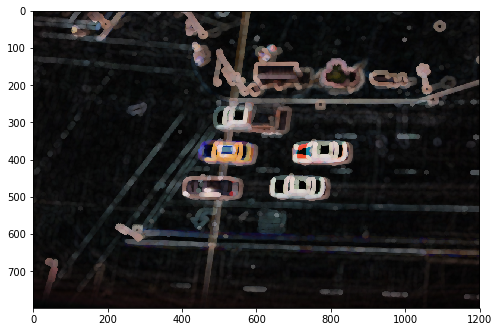

In [31]:
# Apply a morphological gradient (dilate the image, erode the image, and take the difference
elKernel = cv.getStructuringElement(cv.MORPH_ELLIPSE, (13,13))
gradient = cv.morphologyEx(blur, cv.MORPH_GRADIENT, elKernel)
plt.figure(figsize=(8,12))
plt.imshow(cv.cvtColor(gradient, cv.COLOR_BGR2RGB))

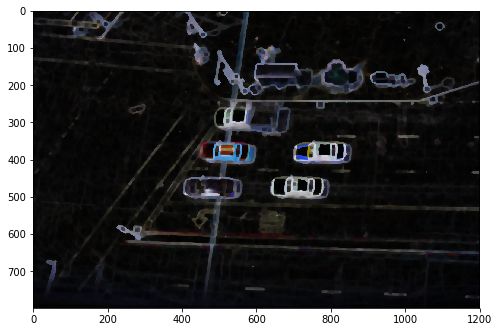

In [32]:
eroded = cv.erode(gradient, None, iterations=3)
plt.figure(figsize=(8,12))
plt.imshow(eroded, cmap='gray')

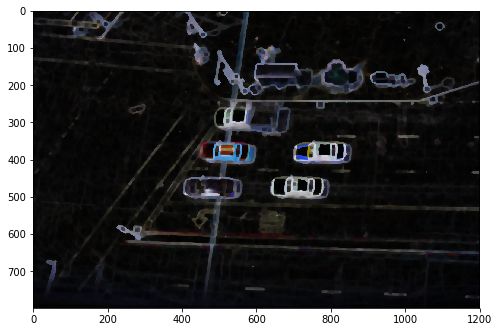

In [33]:
# Apply Otsu's method
gradient = cv.cvtColor(gradient, cv.COLOR_BGR2GRAY)

otsu = cv.threshold(gradient, 0, 255, cv.THRESH_BINARY | cv.THRESH_OTSU)[1]

# Apply a closing operation
closingKernel = cv.getStructuringElement(cv.MORPH_ELLIPSE, (10,10))
close = cv.morphologyEx(otsu, cv.MORPH_CLOSE, closingKernel)
plt.figure(figsize=(8,12))
plt.imshow(eroded, cmap='gray')

## k-Means Clustering.

Color quantization is the process of reducing the number of colors in an image. One reason to do so is to reduce the memory. Sometimes, we might want to group pixels with similar colors together prior to subsequent analysis. Here we use k-means clustering for color quantization.

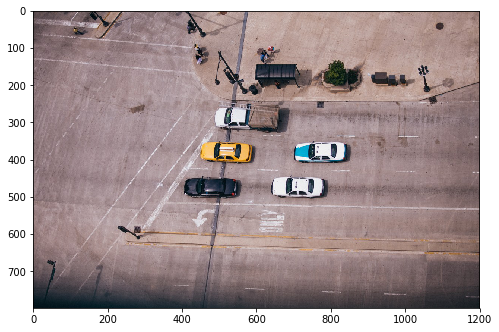

In [34]:
img = cv.imread('data/traffic.jpg')
plt.figure(figsize=(8,12))
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))

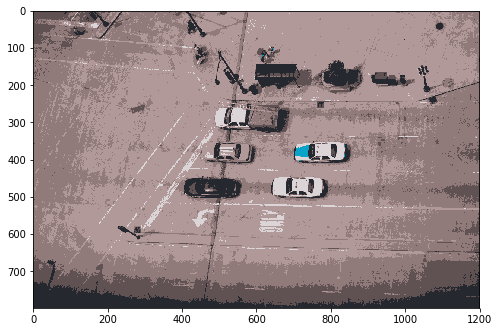

In [35]:
Z = img.reshape((-1,3))

# convert to np.float32
Z = np.float32(Z)

# define criteria, number of clusters(K) and apply kmeans()
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 6
ret,label,center=cv.kmeans(Z,K,None,criteria,10,cv.KMEANS_RANDOM_CENTERS)

# Now convert back into uint8, and make original image
center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((img.shape))

plt.figure(figsize=(8,12))
plt.imshow(cv.cvtColor(res2, cv.COLOR_BGR2RGB))

In [36]:
print(center) # centroid values

[[152 153 176]
 [201 163   8]
 [122 122 145]
 [216 213 219]
 [ 83  81  96]
 [ 47  41  37]]
